<a href="https://colab.research.google.com/github/FranPolo25/Employees-Project/blob/main/M4_Enunciados_Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÓDULO 4 - PLATAFORMAS DE VISUALIZACIÓN**

---

**SESIÓN: Aplica en el trabajo**

NOMBRE: Francisco Javier Polo

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
#Importar google drive para acceder a los documentos almacenados en el drive
from google.colab import drive
drive.mount('/content/drive')

#Importar las librearias a utilizar: pandas, seasborn, matplotlib, numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


2.	Descarga el archivo: Employees.csv y guarda, en un dataframe (`employees`), todos sus registros.

In [ ]:
employee = pd.read_csv('/content/drive/MyDrive/Data Science/Archivos Excel/Employees.csv') #Leer el archivo almacenado en drive y asignarlo a un dataframe llamado employee
employee.info() #Revisar un poco acerca del archivo
#employees_by_hometown = employee.groupby('Hometown').mean()
#employees_by_hometown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

3.	Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `dtypes`, `isna()`)

In [ ]:
#Uso de atributos y metodos
print("Ejemplo de un shape de un dataframe:")
print(employee.shape) #Shape
print("Ejemplo de un columns de un dataframe:")
print(employee.columns) #Columns
print("Ejemplo de un head() de un dataframe:")
print(employee.head(10)) #Head 10 primeros
print("Ejemplo de un dtypes de un dataframe:")
print(employee.dtypes) #dtypes
print("Ejemplo de un isna() de un dataframe:")
employee.isna().sum() #isna()

Ejemplo de un shape de un dataframe:
(7000, 17)
Ejemplo de un columns de un dataframe:
Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'Attrition_rate'],
      dtype='object')
Ejemplo de un head() de un dataframe:
  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   
5    EID_2278      M  54.0                3      

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

4.	Calcula el % total de valores faltantes y elimina los registros que contengan `NaN`

In [ ]:
employee
employee.isna().sum() #Observar la cantidad de registros con valores NaN dentro de todo el archivo por cada columna

#Obtener el numero total de registros/filas dentro del archivo
print("Tamaño total del archivo de datos a analizar:", employee.shape) #Shape

#Obtener el numero total de valores faltantes dentro de cada columna y su porcentaje:
employee_NaN = employee.isnull().sum(min_count=1)
employee_NaN = employee_NaN[employee_NaN != 0]
total_missing = 0
print(f"Número de columnas con datos faltantes: {employee_NaN.shape[0]}")

#Condicional para obtener la columna y total de datos faltantes y posteriormente calcular el promedio
if employee_NaN.shape[0]:
    print("Recuento de valores nulos por columna: ")
    for name, miss_vals in employee_NaN.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
              f"{miss_vals} dato{'s' if p else ''}.")
        print("En la columna ", name, "faltan", miss_vals, "de un total de 7000 registros, dando un porcentaje total de:", (miss_vals*100/7000), "% valores faltantes")
        total_missing = miss_vals + total_missing
        print("Total de datos faltantes en todas las columnas es de: ", total_missing, "dando un porcentaje total de datos faltanes de:", (total_missing*100/7000), "% valores faltantes")

#Eliminar todos los registros que contengan un valor NaN dentro de las columnas identificadas
employee.dropna(axis=0,subset=['Age','Time_of_service','Work_Life_balance','Pay_Scale'],inplace=True)
employee.isna().sum() #Comprobacion de la eliminacion de los valores NaN de cada columna

Tamaño total del archivo de datos a analizar: (7000, 17)
Número de columnas con datos faltantes: 4
Recuento de valores nulos por columna: 
  - A la columna 'Age' le faltan 412 datos.
En la columna  Age faltan 412 de un total de 7000 registros, dando un porcentaje total de: 5.885714285714286 % valores faltantes
Total de datos faltantes en todas las columnas es de:  412 dando un porcentaje total de datos faltanes de: 5.885714285714286 % valores faltantes
  - A la columna 'Time_of_service' le faltan 144 datos.
En la columna  Time_of_service faltan 144 de un total de 7000 registros, dando un porcentaje total de: 2.057142857142857 % valores faltantes
Total de datos faltantes en todas las columnas es de:  556 dando un porcentaje total de datos faltanes de: 7.942857142857143 % valores faltantes
  - A la columna 'Pay_Scale' le faltan 9 datos.
En la columna  Pay_Scale faltan 9 de un total de 7000 registros, dando un porcentaje total de: 0.12857142857142856 % valores faltantes
Total de datos fal

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

5.	Obtén la cantidad de valores únicos por columna, para responder:
*  ¿Cuántos niveles educativos hay?
*  ¿Cuántas ciudades participaron en el estudio?


In [ ]:
print("La cantidad de niveles educativos que hay dentro del archivo de datos es de: ", employee['Education_Level'].nunique()) #Obtener valores unicos de la columna Education_Level con el nunique()
print("La cantidad de ciudades que participaron en el estudio es de: ", employee['Hometown'].nunique()) #Obtener valores unicos de la columna Hometown con el nunique()

La cantidad de niveles educativos que hay dentro del archivo de datos es de:  5
La cantidad de ciudades que participaron en el estudio es de:  5


6.	Realiza el conteo de valores por categoría (`value_counts()`) para las columnas de género y estado civil

In [ ]:
count_values = employee[['Gender', 'Relationship_Status']].value_counts() #Conteo de valores por categoria de la columna de Genero y Estado Civil
count_values #Imprimir el resultado

Gender  Relationship_Status
F       Married                2462
M       Married                1691
F       Single                 1329
M       Single                  951
dtype: int64

7.	A través de la función `describe()` responde:
*  ¿Cuál es el tiempo máximo de servicio?
*  ¿Qué promedio de edad tienen los empleados encuestados?
*  ¿Cuál es el valor del 1er cuartil en la escala de pago?



In [ ]:
employee.describe() #Funcion describe
#¿Cuál es el tiempo máximo de servicio? - El tiempo maximo de servicio es de 43.0
print("Máximo valor de tiempo de servicio: ", employee.describe().loc['max','Time_of_service']) #Obtener el valor maximo de la columna de Time_of_service
#¿Qué promedio de edad tienen los empleados encuestados? - La edad promedio de los empleados es de 39.5
print("La edad promedio de los empleados encuestados es de: ", employee['Age'].mean()) #Obtener el valor promedio de la columna Age
#¿Cuál es el valor del 1er cuartil en la escala de pago? - El valor del primer cuartil es de 5.0
print("1er cuartil en la escala de pago: ", employee.describe().loc['25%','Pay_Scale']) #Obtener el 25% de la columna Pay_Scale

Máximo valor de tiempo de servicio:  43.0
La edad promedio de los empleados encuestados es de:  39.577024716306546
1er cuartil en la escala de pago:  5.0


8.	Elabora en un histograma con las edades para identificar el rango más común.

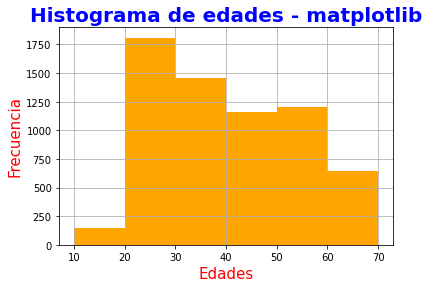

In [ ]:
# Matplotlib
plt.hist(x=employee['Age'], bins=[10,20,30,40,50,60,70], color="orange") #Histograma de la columna de Age
plt.title('Histograma de edades - matplotlib', fontsize=20, color='blue',fontweight='bold') #Poner titulo
plt.xlabel('Edades', fontsize=15, color='red') #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.grid(True) #Poner grid en la grafica
#El rango mas comun de edades de acuerdo al histograma mostrado seria entre los 20 y 30 años

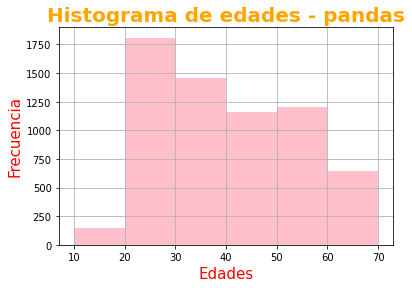

In [ ]:
# Pandas
employee['Age'].plot.hist(bins=[10,20,30,40,50,60,70], color="pink") #Histograma de la columna de Age
plt.title('Histograma de edades - pandas', fontsize=20, color='orange', fontweight='bold') #Poner titulo
plt.xlabel('Edades', fontsize=15, color='red') #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.grid(True) #Poner grid en la grafica
#El rango mas comun de edades de acuerdo al histograma mostrado seria entre los 20 y 30 años

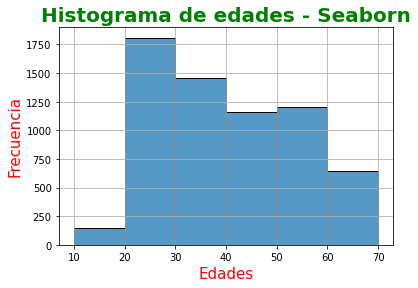

In [ ]:
# Seaborn
sns.histplot(x=employee['Age'],bins=[10,20,30,40,50,60,70]) #Histograma de la columna de Age
plt.title('Histograma de edades - Seaborn', fontsize=20, color='green', fontweight='bold') #Poner titulo
plt.xlabel('Edades', fontsize=15, color='red') #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.grid(True) #Poner grid en la grafica
#El rango mas comun de edades de acuerdo al histograma mostrado seria entre los 20 y 30 años

9.	Construye un gráfico de frecuencias (o conteo) para las unidades funcionales (`Unit`). ¿En qué unidad hay mayor número de empleados?

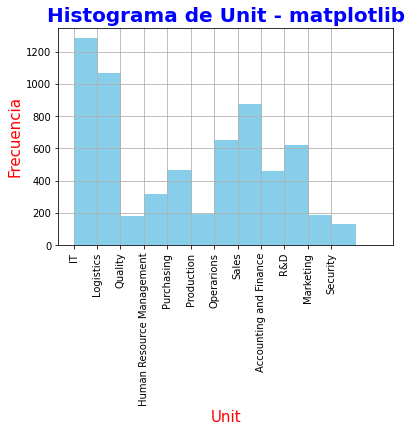

In [ ]:
# Matplotlib
plt.hist(employee['Unit'], color = "skyblue", ec="skyblue", bins=range(0,12+2)) #Histograma de la columna de Unit
plt.title('Histograma de Unit - matplotlib', fontsize=20, color='blue',fontweight='bold') #Poner titulo
plt.xlabel('Unit', fontsize=15, color='red') #Xlabels edicion
plt.xticks(rotation = 90) #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.grid(True) #Poner grid en la grafica
#¿En qué unidad hay mayor número de empleados? - De acuerdo al histograma en la unidad de IT se encuentra el mayor numero de empleados

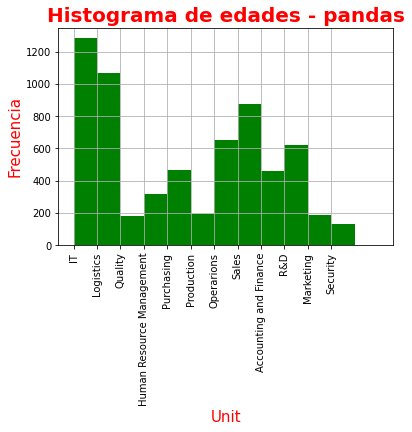

In [ ]:
# Pandas
#probablemente tengamos que hacerlo indice no estoy seguro
employee['Unit'].hist(bins=range(0,12+2), color="green") #Histograma de la columna de Unit
plt.title('Histograma de edades - pandas', fontsize=20, color='red', fontweight='bold') #Poner titulo
plt.xlabel('Unit', fontsize=15, color='red') #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.xticks(rotation = 90) #Xlabels edicion
plt.grid(True) #Poner grid en la grafica
#¿En qué unidad hay mayor número de empleados? - De acuerdo al histograma en la unidad de IT se encuentra el mayor numero de empleados

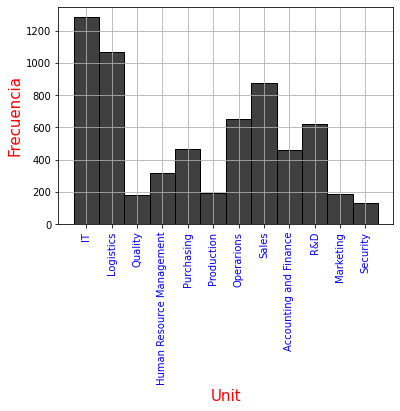

In [ ]:
# Seaborn
sns.histplot(x=employee['Unit'],bins=[10,20,30,40,50,60,70], color="black") #Histograma de la columna de Unit
plt.xlabel('Unit', fontsize=15, color='red') #Xlabels edicion
plt.xticks(rotation = 90, color="blue") #Xlabels edicion
plt.ylabel('Frecuencia', fontsize=15, color='red') #Ylabels edicion
plt.grid(True) #Poner grid en la grafica
#¿En qué unidad hay mayor número de empleados? - De acuerdo al histograma en la unidad de IT se encuentra el mayor numero de empleados

10.	Realiza una agrupación por ciudad, con el promedio de todas las columnas y almacena el resultado en un nuevo dataframe (`employees_by_hometown`).

In [ ]:
employees_by_hometown = employee.groupby('Hometown').mean() #Crear un nuevo dataframe que contenga el promedio de los valores de cada columna agrupado por la columna Hometown
employees_by_hometown #Imprimir el resultado obtenido

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
Hometown,,,,,,,,,,
Clinton,38.968992,3.160853,12.870155,2.286822,47.544574,0.868217,2.786822,6.046512,2.443798,0.186583
Franklin,40.029496,3.193525,13.730935,2.367626,47.001439,0.818705,2.774820,6.008633,2.405755,0.187646
Lebanon,40.024109,3.225367,13.825472,2.368973,46.539832,0.798742,2.790356,5.984801,2.370021,0.185662
Springfield,39.007500,3.157500,13.003125,2.368125,47.037500,0.822500,2.803750,6.068125,2.396875,0.196218
Washington,39.324828,3.181551,13.022571,2.378803,47.945044,0.808636,2.799804,5.909715,2.366045,0.187768


11.	Visualiza el dataframe obtenido en una única gráfica (usando Pandas: `employees_by_hometown.plot()`). Como no es legible por la diferencia de escalas en las columnas, sepáralas en subplots. ¿Qué ciudad tiene el mayor índice de deserción? Observa el resto de sus variables

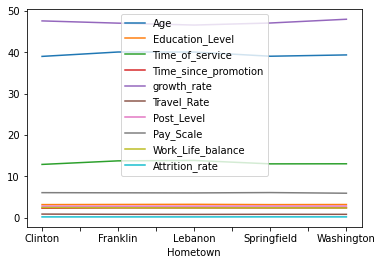

In [ ]:
employees_by_hometown.plot() #Observar que el grafico se visualiza de una manera que no se puede apreciar de manera correcta

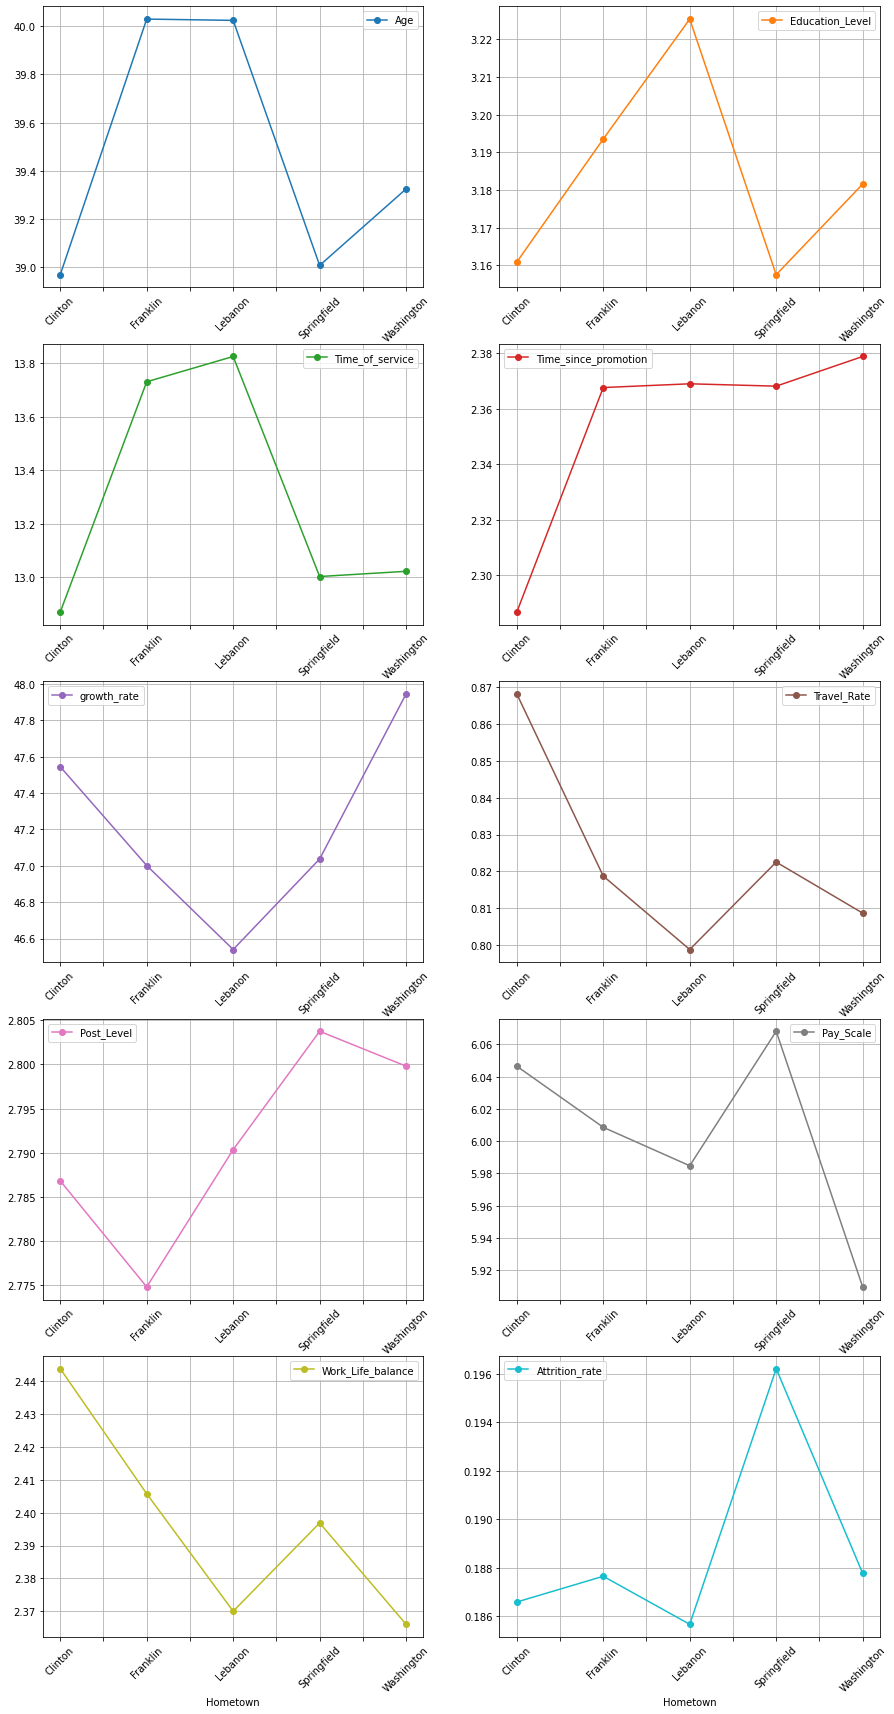

In [ ]:
#employees_by_hometown.plot() #Observar que el grafico se visualiza de una manera que no se puede apreciar de manera correcta
indice_desercion = employees_by_hometown.loc[:,'Age':'Attrition_rate'].plot(subplots=True, layout=(5,2), figsize=(15,30), rot=45, grid=True, xlabel='Hometown',marker='o', sharex=False) #Creacion de subplots para la visualizacion individual de cada grafica y poder tener una mejor comprehension
#¿Qué ciudad tiene el mayor índice de deserción? - La ciudad con mayor indice de desercion es Springfield con 0.19621775%, lo podemos encontrar en el subplot final

12.	Utiliza el dataframe original (sin los NaN) para analizar el impacto del nivel educativo en la escala de pago. Para ello construye un box plot que considere estas dos variables.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


([<matplotlib.axis.YTick at 0x7f9147009c50>,
 <a list of 10 Text major ticklabel objects>)

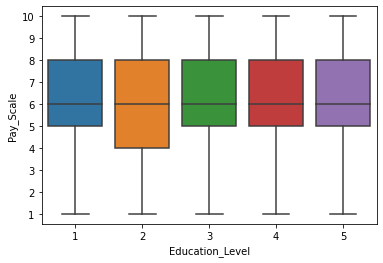

In [ ]:
employee #Volver a llamar el dataframe original / Volver a llamar el paso 2.	Descarga el archivo: Employees.csv y guarda, en un dataframe (`employees`)
impacto_educativo = employee[['Education_Level', 'Pay_Scale']]  #Crear un dataframe del original el cual solo tenga las columnas que necesitamos analizar
impacto_educativo.dropna(axis=0,subset=['Pay_Scale'],inplace=True) #Eliminar los valores NaN del dataframe original dentro de la columna de PayScale para no tener resultados incorrectos
#impacto_educativo.plot.box(title='Education_Level', x='Education_Level',y='Pay_Scale', grid=True,) #Muestra del bloxplot con todos los niveles educativos al mismo tiempo
sns.boxplot(x=impacto_educativo['Education_Level'],y=impacto_educativo['Pay_Scale']) #Muestra del boxplot de cada nivel educativo por separado
plt.yticks(range(1,11,1))

#Analisis obtenido
#En todos los boxplot obtenidos podemos observar que el valor maximo es de 10 en la escala de PayScale, y el valor minimo es de 1.
#El primer cuartil muestra en los niveles de educacion 1,3,4 y 5 un valor de 5, por lo que podemos decir que el 25% de esos niveles educativos tiene un valor de menor o igual a 5 en la escala de pago, mientras que en nivel educativo 2 se tiene un valor de escala dde pago de 4
#El segundo cuartil muestra en todos los niveles educativos un valor de 6, por lo que podemos decir que el 50% de estos niveles educativos tienen un valor de menor o igual a 6 en la escala de pago
#El tercel cuartil muestra en todos los niveles educativos un valor de 6, por lo que podemos decir que el 75% de estos niveles educativos tienen un valor de menor o igual a 8 en la escala de pago
#En cuanto a los extremos podemos ver que el maximo valor en la escala de pagos es de 10 y el menor es de 1
#Podemos observar que no tenemos valores atipicos dentro de todo el boxplot

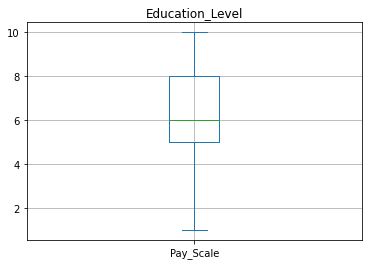

In [ ]:
impacto_educativo.plot.box(title='Education_Level', x='Education_Level',y='Pay_Scale', grid=True,) #Muestra del bloxplot con todos los niveles educativos al mismo tiempo, este boxplot no muestra a detalle cada nivel educativo dentro del archivo, aunque es entendible, es de mayor preferencia observar cada nivel educativo en la misma escala ya que obtenemos mayor detalle en nuestro analisis

13.	Elabora dos scatter plots (del dataframe original sin NaN) para determinar si hay correlación entre:
*   Edad y Tasa de deserción
*   Tiempo de servicio y Tasa de deserción

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


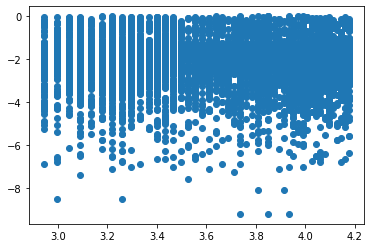

In [ ]:
employee #Volver a llamar el dataframe
plt.scatter(x=np.log(employee['Age']), y=np.log(employee['Attrition_rate'])) #Scatterplot para determinar la correlacion entre edad y tasa de desercion
#Analisis obtenido
#De acuerdo con el scatterplot obtenido podemos ver que no existe una correlacion positiva o negativa entre las dos variables edad y tasa de desercion ya que la grafica no muestra ninguna pendiente positiva o negativa con los datos

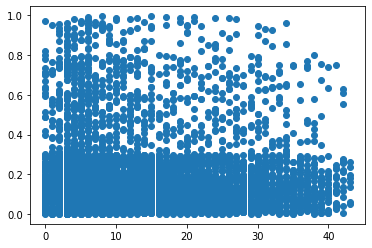

In [ ]:
plt.scatter(x=employee['Time_of_service'], y=employee['Attrition_rate']) #Scatterplot para determinar la correlacion entre tiempo de servicio y tasa de desercion
#Analisis obtenido
#De acuerdo con el scatterplot obtenido podemos ver que no existe una correlacion positiva o negativa entre las dos variables tiempo de servicio y tasa de desercion ya que la grafica no muestra ninguna pendiente positiva o negativa con los datos

14.	Crea un heatmap  (del dataframe original sin NaN) que muestre la correlación entre todos los pares de variables numéricas.

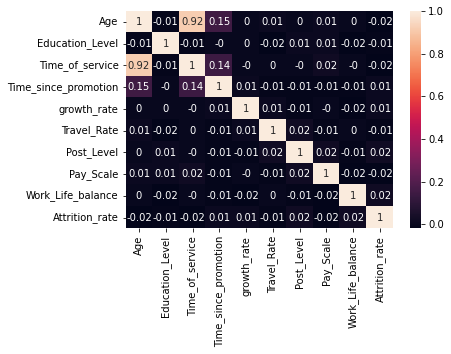

In [ ]:
sns.heatmap(round(employee.corr(),2), annot=True) #Obtener un heatmap del dataframe para mostrar la correlacion de todas las columnas del mismo
#Analisis obtenido
#Podemos ver dentro del heatmap que edad y tasa de desercion tienen una correlacion de -0.02 lo cual es muy cercana a cero por lo que el resultado anteriormente es correcto y verificamos que tenemos una correlacion nula
#Podemos ver dentro del heatmap que tiempo de servicio y tasa de desercion tienen una correlacion de -0.02 lo cual es muy cercana a cero por lo que el resultado anteriormente es correcto y verificamos que tenemos una correlacion nula